In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
sns.set_style("whitegrid")

In [5]:
df = pd.read_csv('kyphosis.csv')

In [6]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


C:\Users\Nile\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


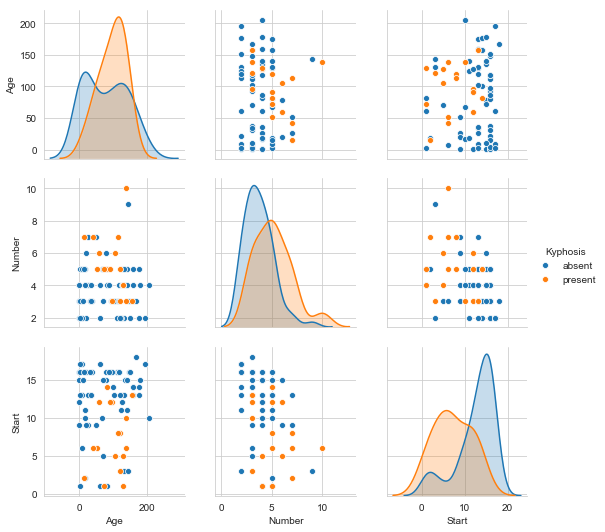

In [7]:
sns.pairplot(df,hue = 'Kyphosis')

In [8]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

## Train test split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df[['Age', 'Number', 'Start']]
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## Implement Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt = DecisionTreeClassifier()

In [13]:
tree_pred = dt.fit(X_train,y_train)

In [14]:
prediction = tree_pred.predict(X_test)

In [15]:
d = {'real_Data': y_test , 'Predict_Data': prediction}
resultdf = pd.DataFrame(data = d)

In [16]:
resultdf.head()

,real_Data,Predict_Data
65,absent,absent
29,absent,absent
71,absent,absent
77,absent,absent
55,absent,absent


## Report

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[19  3]
 [ 3  2]]
              precision    recall  f1-score   support

      absent       0.86      0.86      0.86        22
     present       0.40      0.40      0.40         5

   micro avg       0.78      0.78      0.78        27
   macro avg       0.63      0.63      0.63        27
weighted avg       0.78      0.78      0.78        27



## Implement Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rfc = RandomForestClassifier(n_estimators = 200)

In [21]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
prediction2 = rfc.predict(X_test)

In [23]:
d2 = {'real_Data': y_test , 'Predict_Data': prediction2}
resultdf2 = pd.DataFrame(data = d2)

In [24]:
resultdf2.head()

,real_Data,Predict_Data
65,absent,absent
29,absent,absent
71,absent,absent
77,absent,absent
55,absent,absent


## Report

In [25]:
print(confusion_matrix(y_test,prediction2))
print(classification_report(y_test,prediction2))

[[22  0]
 [ 4  1]]
              precision    recall  f1-score   support

      absent       0.85      1.00      0.92        22
     present       1.00      0.20      0.33         5

   micro avg       0.85      0.85      0.85        27
   macro avg       0.92      0.60      0.62        27
weighted avg       0.87      0.85      0.81        27



## Visualize Tree

In [27]:
# pip install graphviz
# pip install pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt,out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found